# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#Loading Package & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
train=pd.read_csv("Train.csv")
test=pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Data Successfully Inserted

#Data Structure & Content

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [8]:
#Checking null values
df_missing_value=train.isnull().sum()
df_missing_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Columns in data set
train.columns
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

#EDA

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Item_Fat_Content'>

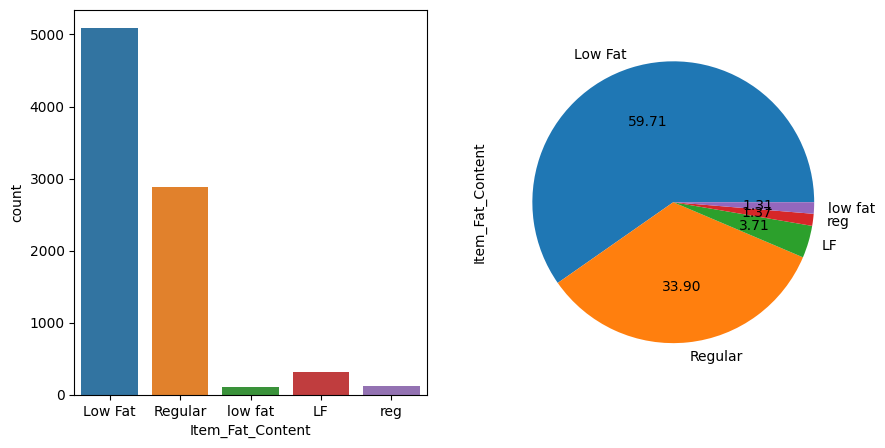

In [12]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(train['Item_Fat_Content'])
plt.subplot(1,2,2)
train['Item_Fat_Content'].value_counts().plot(kind='pie',autopct='%.2f')

In [13]:
train['Item_Type'].nunique()

16

In [14]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

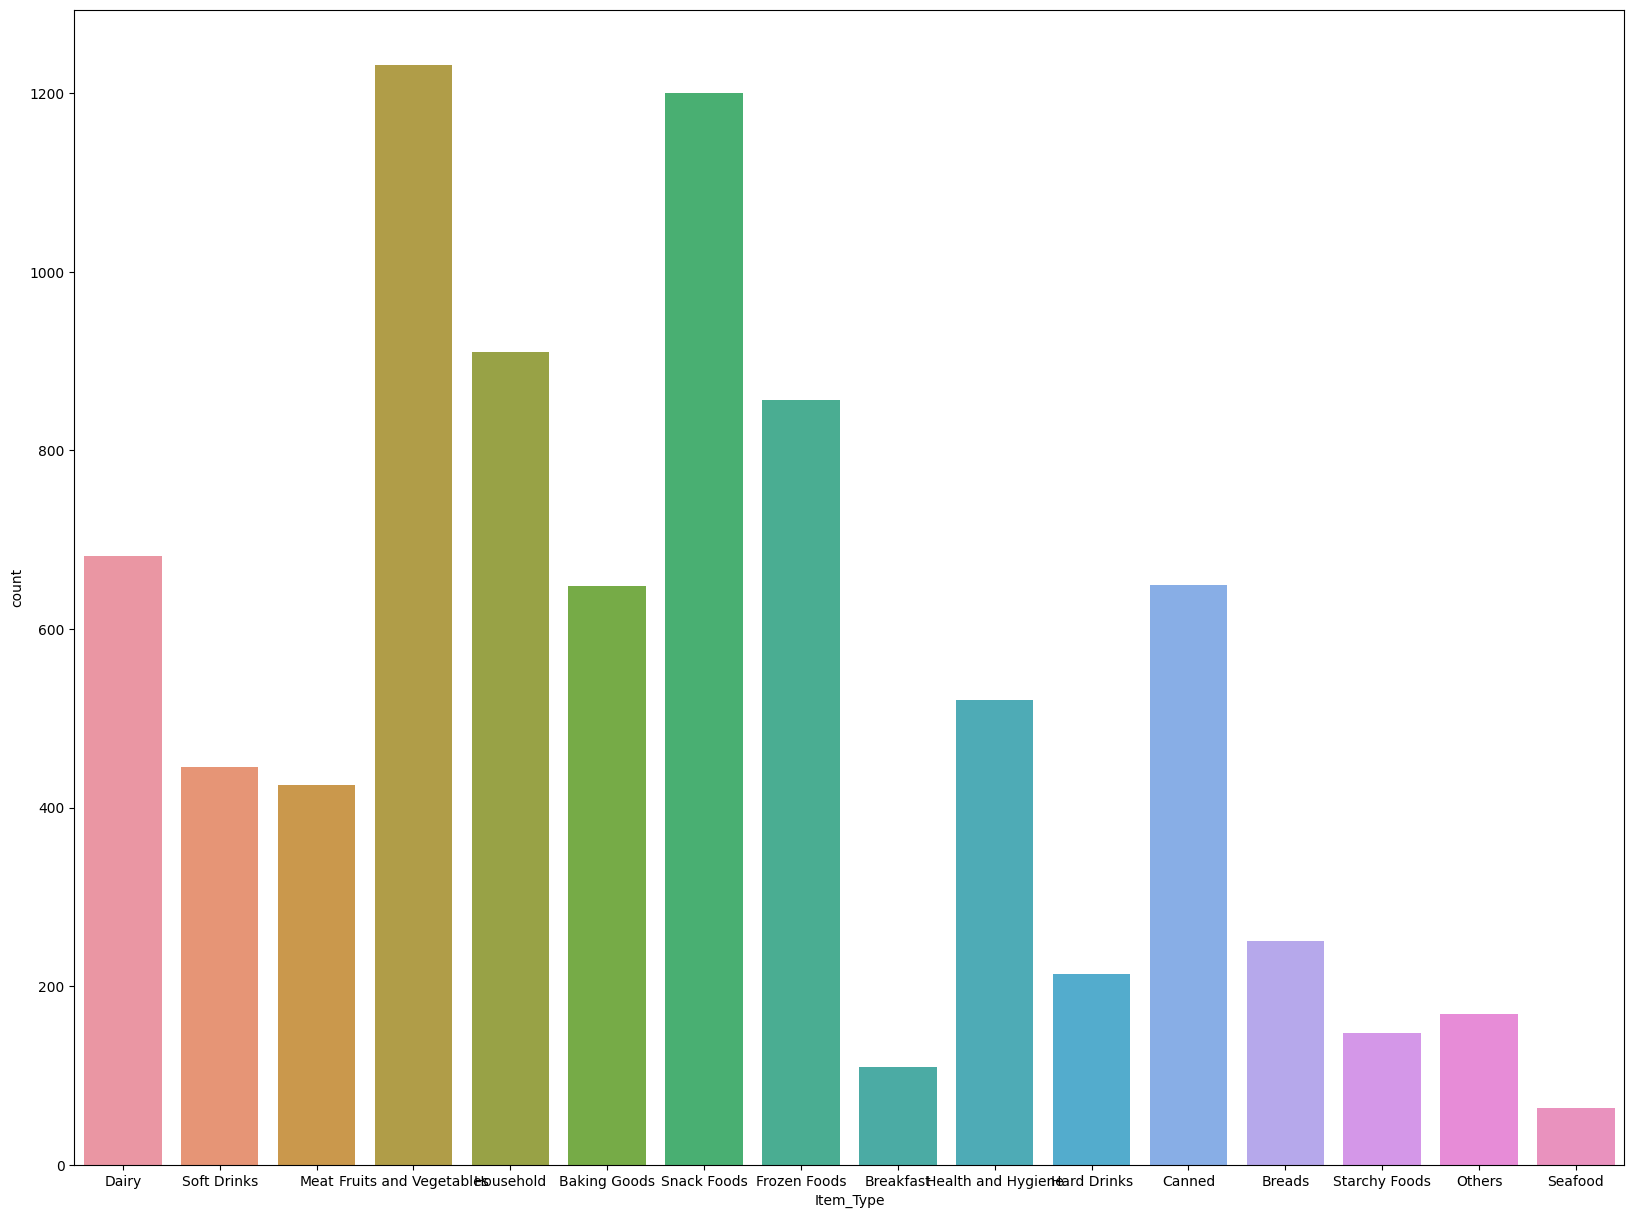

In [22]:
fig=plt.figure(figsize=(20,15))
sns.countplot(train['Item_Type'])

Graphs Shows that Vegetables, Snack Food, Frozen Food are in Demand

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


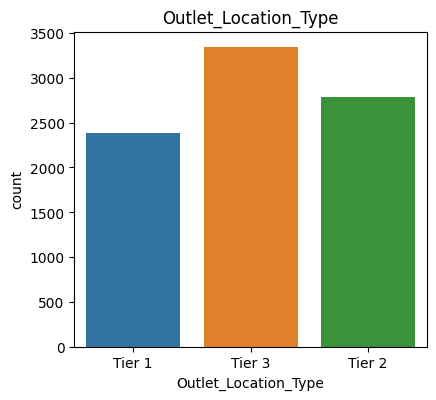

In [63]:
fig=plt.figure(figsize=(10,9))
sns.countplot(train['Outlet_Location_Type'])
ax1.title.set_text('Outlet_Location_Type')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


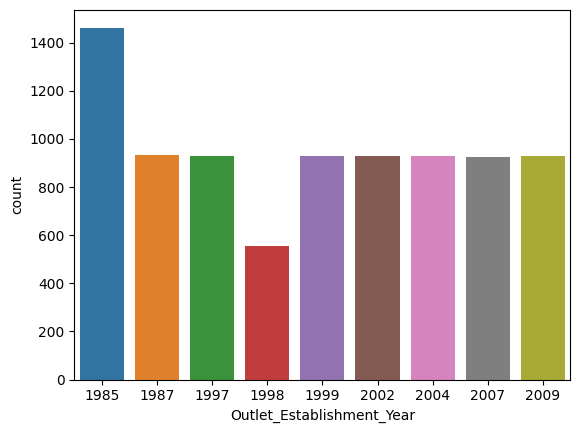

In [65]:

sns.countplot(train['Outlet_Establishment_Year'])
ax1.title.set_text('Outlet_Establishment_Year')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


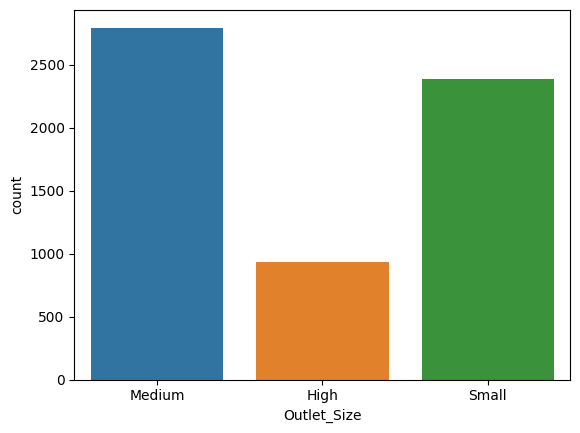

In [68]:

sns.countplot(train['Outlet_Size'])
ax1.title.set_text('Outlet_Size')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


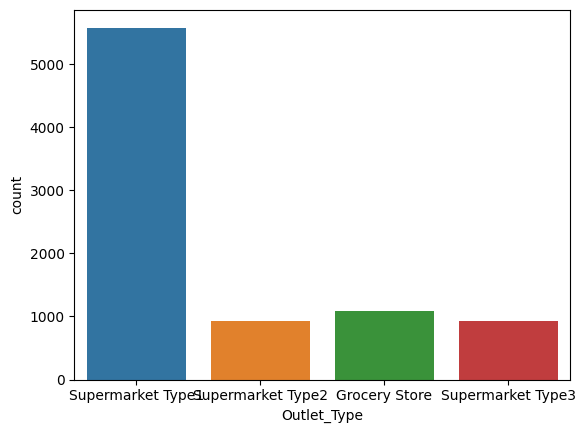

In [31]:
sns.countplot(train['Outlet_Type'])
ax1.title.set_text(['Outlet_Type'])

Numerical Columns

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


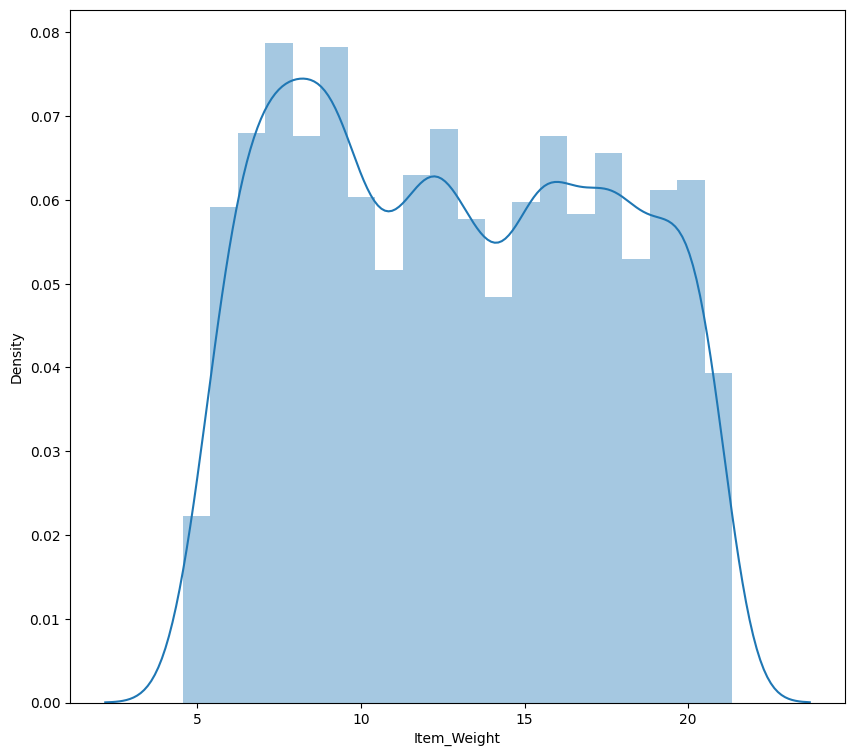

In [52]:
fig=plt.figure(figsize=(10,9))
sns.distplot(train['Item_Weight'])
ax1.title.set_text('Item_Weight')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


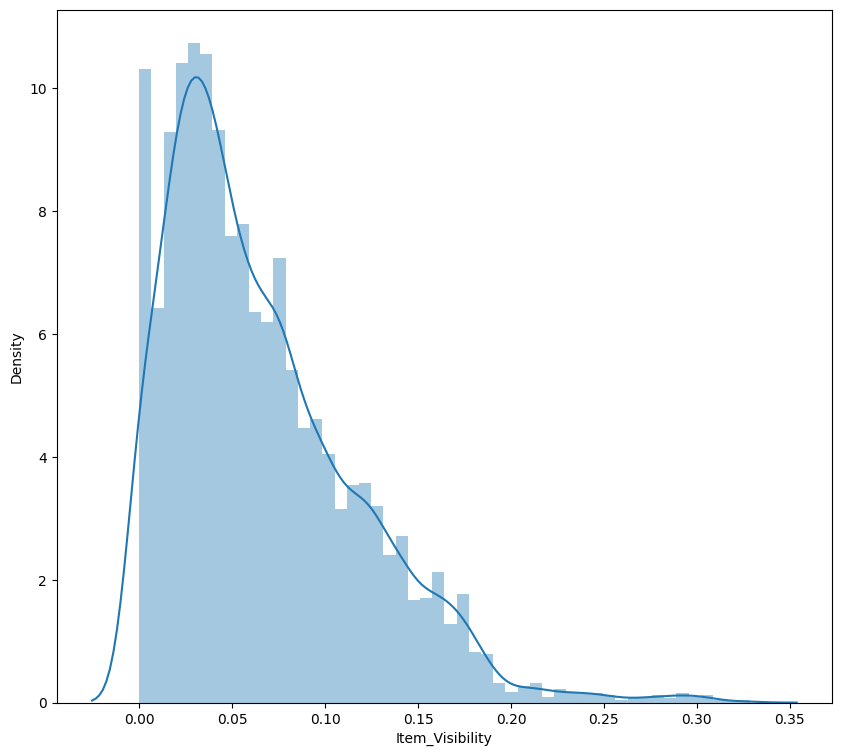

In [53]:
fig=plt.figure(figsize=(10,9))
sns.distplot(train['Item_Visibility'])
ax1.title.set_text('Item_Visibility')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


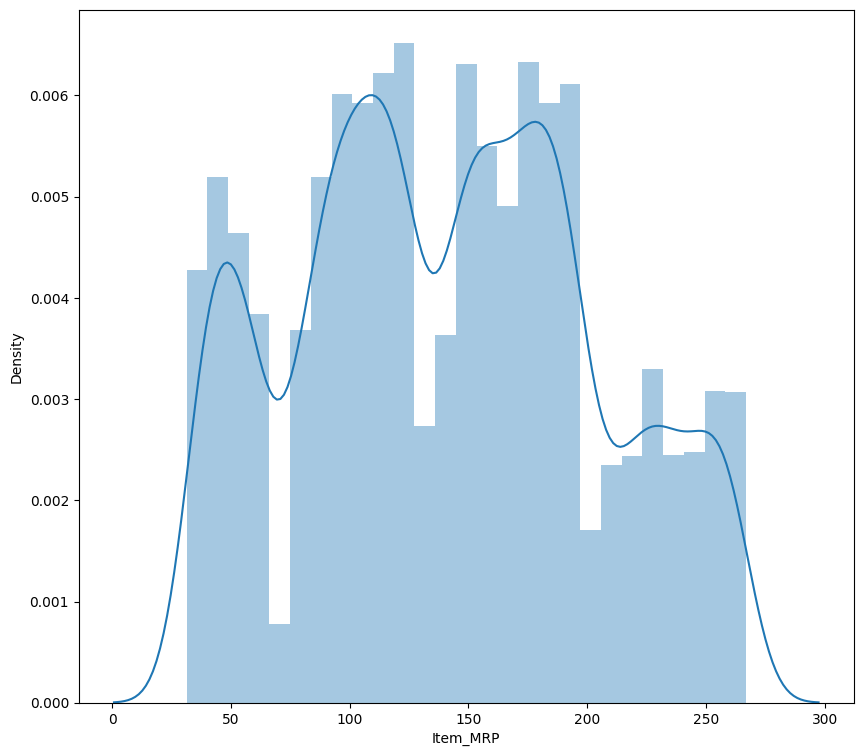

In [54]:
fig=plt.figure(figsize=(10,9))
sns.distplot(train['Item_MRP'])
ax1.title.set_text('Item_MRP')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


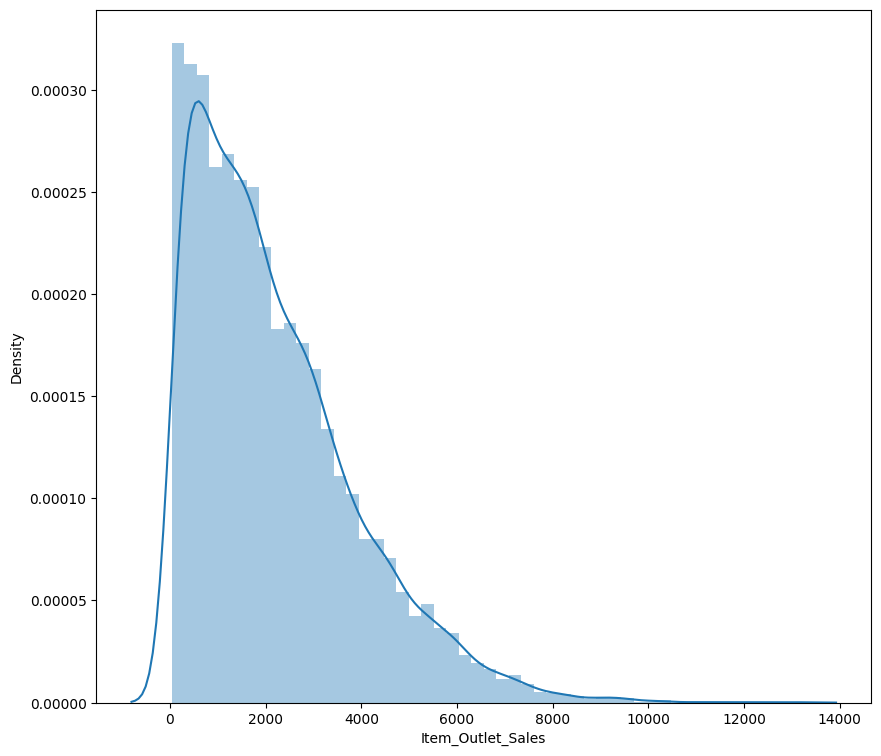

In [50]:
fig=plt.figure(figsize=(10,9))
sns.distplot(train['Item_Outlet_Sales'])
ax1.title.set_text('Item_Outlet_Sales')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


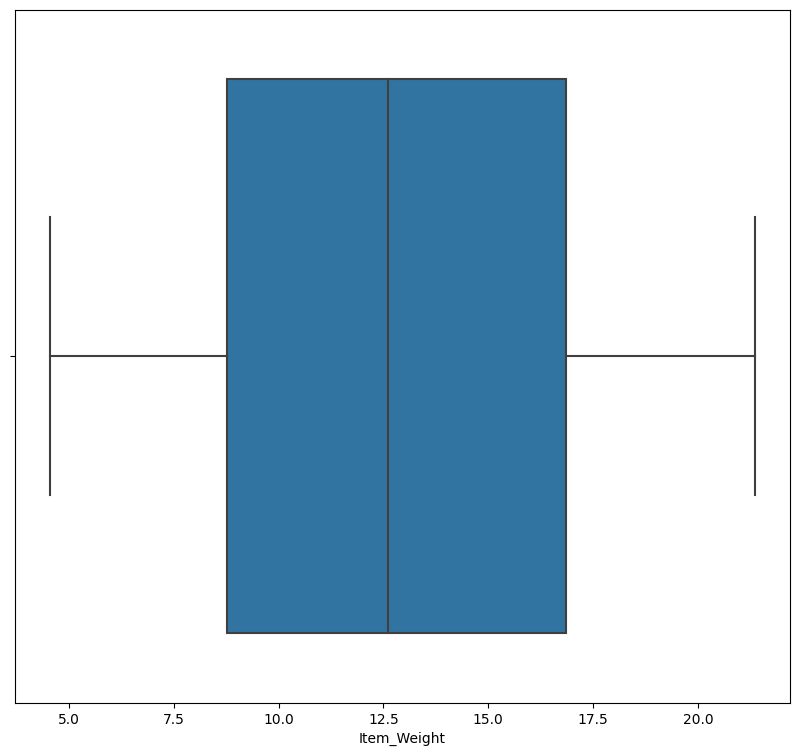

In [39]:
fig=plt.figure(figsize=(10,9))
sns.boxplot(train['Item_Weight'])
ax1.title.set_text('Item_Weight')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


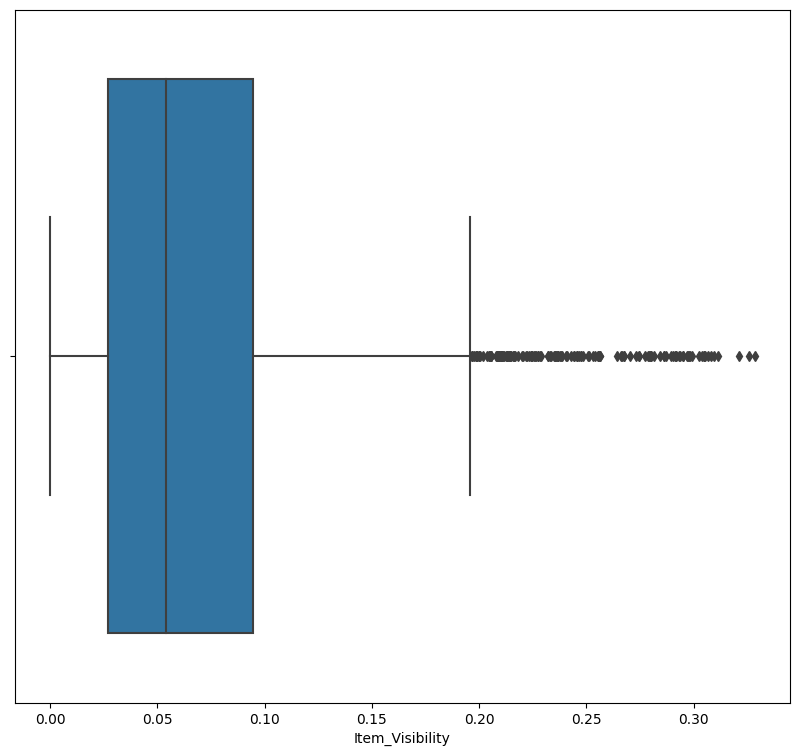

In [40]:
fig=plt.figure(figsize=(10,9))
sns.boxplot(train['Item_Visibility'])
ax1.title.set_text('Item_Visibility')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


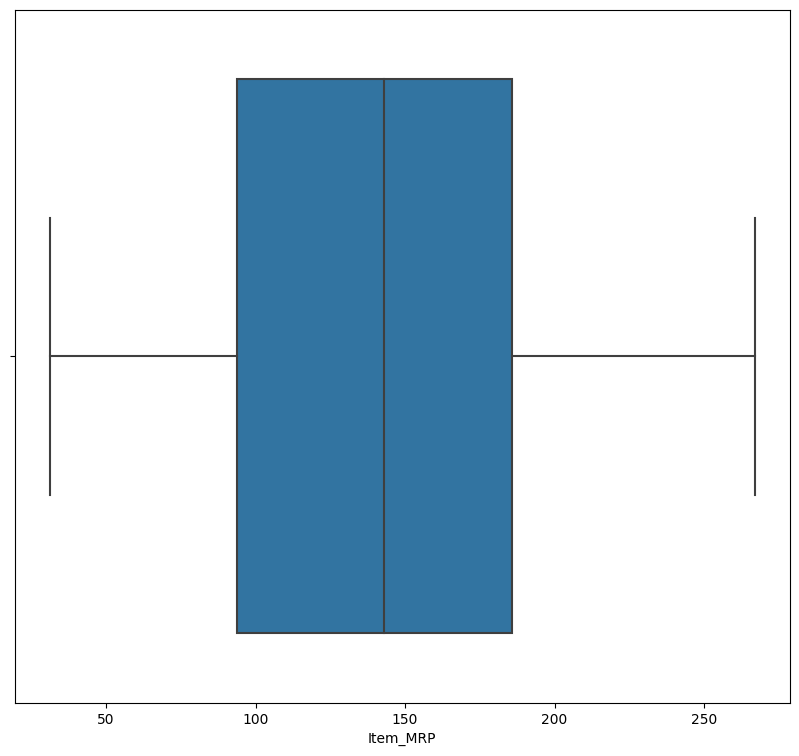

In [41]:
fig=plt.figure(figsize=(10,9))
sns.boxplot(train['Item_MRP'])
ax1.title.set_text('Item_MRP')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


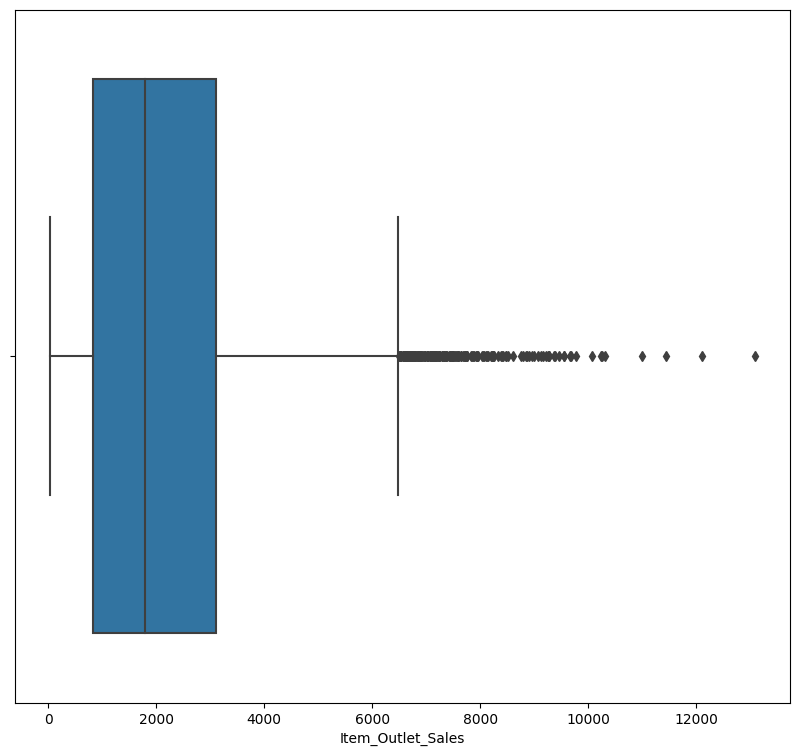

In [42]:
fig=plt.figure(figsize=(10,9))
sns.boxplot(train['Item_Outlet_Sales'])
ax1.title.set_text('Item_Outlet_Sales')

In [43]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Bivariate Analysis

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


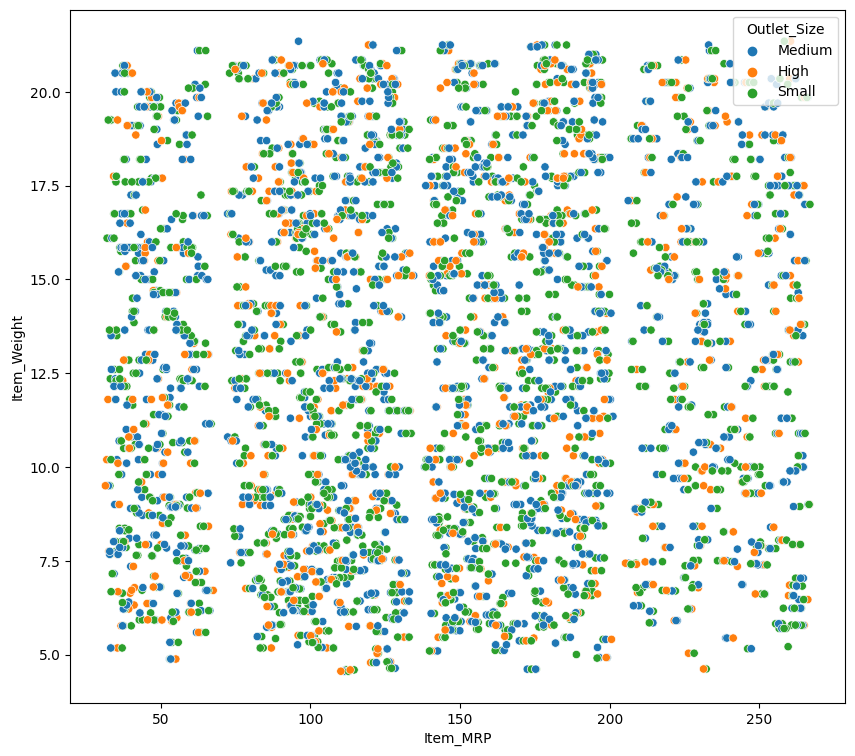

In [44]:
fig=plt.figure(figsize=(10,9))
sns.scatterplot(train['Item_MRP'],train['Item_Weight'],hue=train['Outlet_Size'])
ax1.title.set_text('Item_Weight vs Item_MRP')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


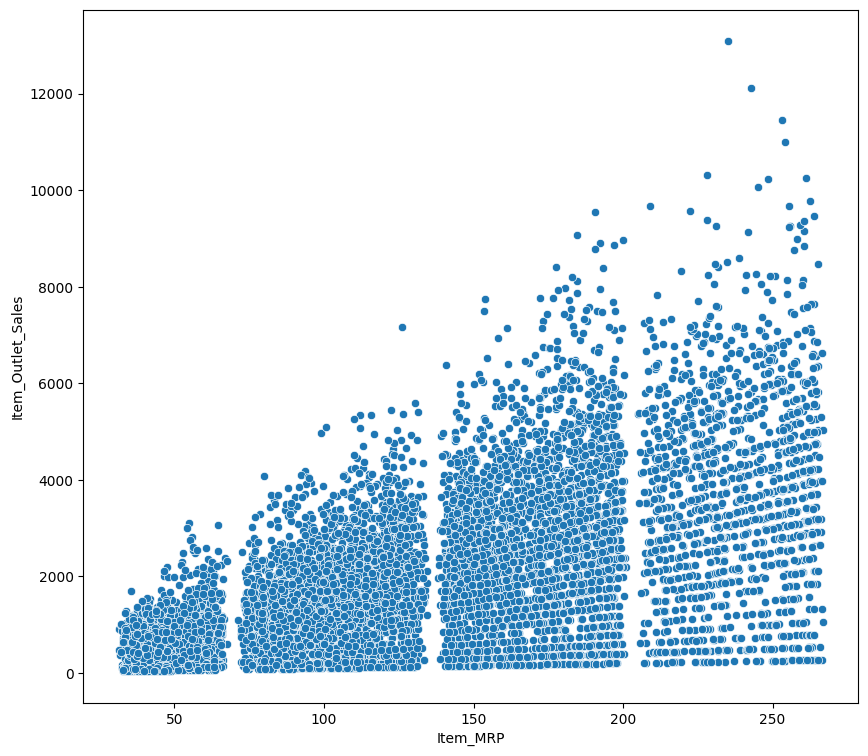

In [45]:
fig=plt.figure(figsize=(10,9))
sns.scatterplot(train['Item_MRP'],train['Item_Outlet_Sales'])
ax1.title.set_text('Sales vs Item_MRP')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


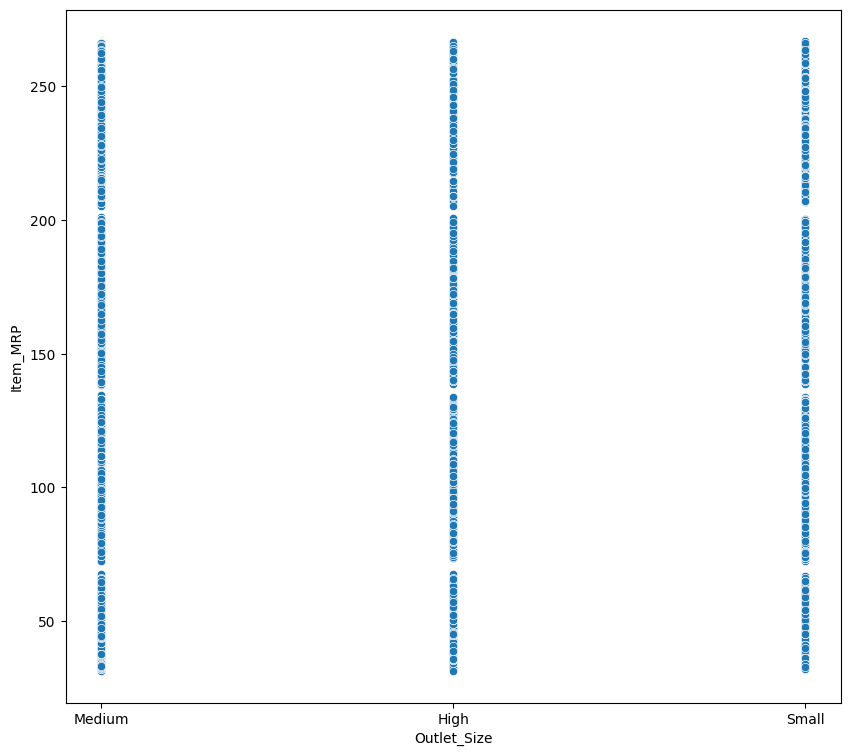

In [46]:
fig=plt.figure(figsize=(10,9))
sns.scatterplot(train['Outlet_Size'],train['Item_MRP'])
ax1.title.set_text('Size vs Item_MRP')

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


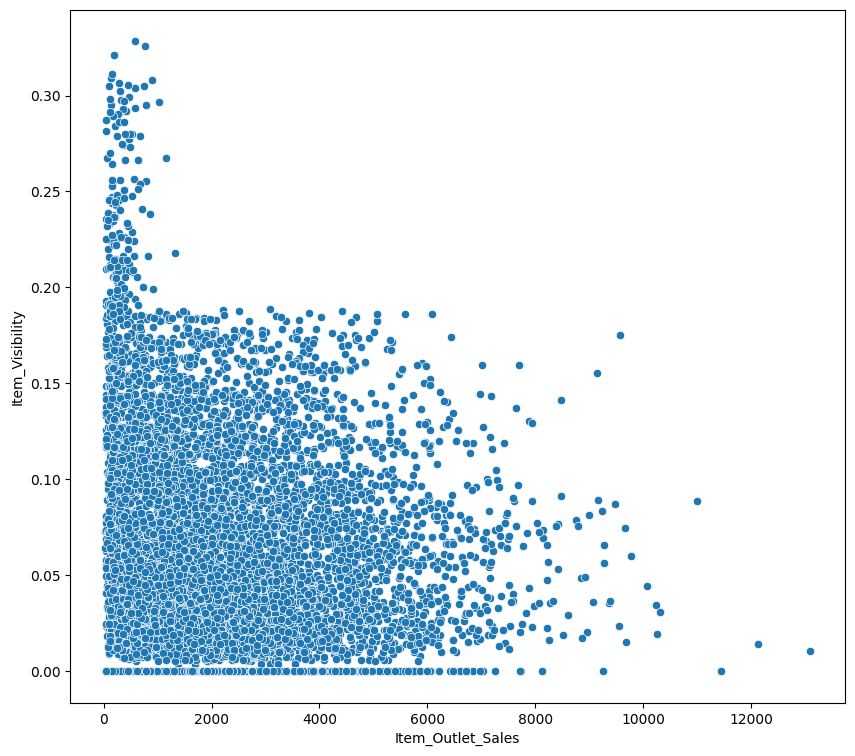

In [47]:
fig=plt.figure(figsize=(10,9))
sns.scatterplot(train['Item_Outlet_Sales'],train['Item_Visibility'])
ax1.title.set_text('Item_Weight vs Item_MRP')

MRP Increases Sales Increases 

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


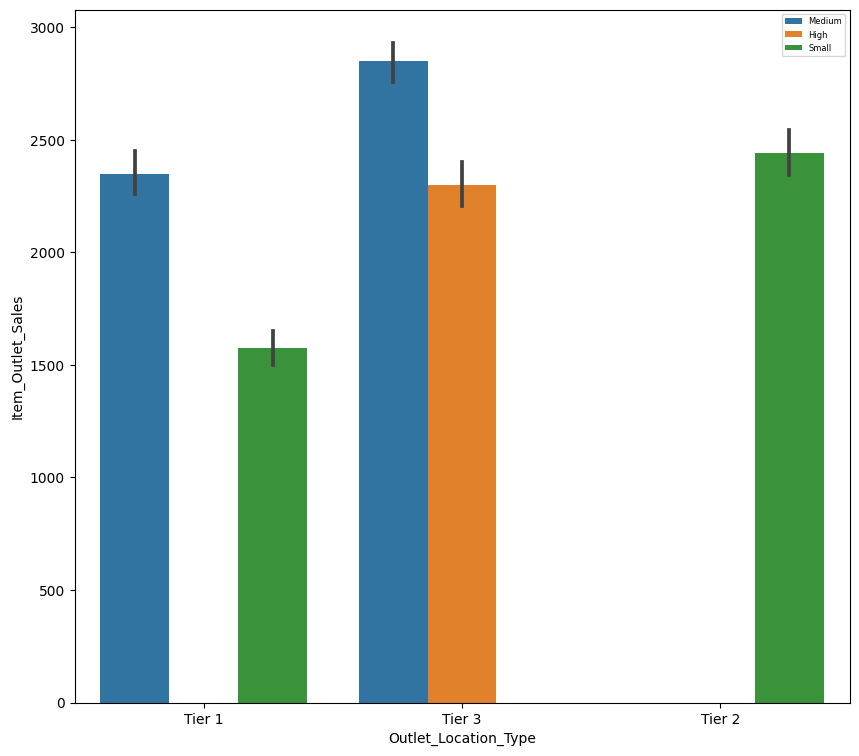

In [49]:
fig = plt.figure(figsize=(10,9))
y=sns.barplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'])
ax1.title.set_text(' location vs sales')
plt.legend(loc='upper right')
y.legend(fontsize=6)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


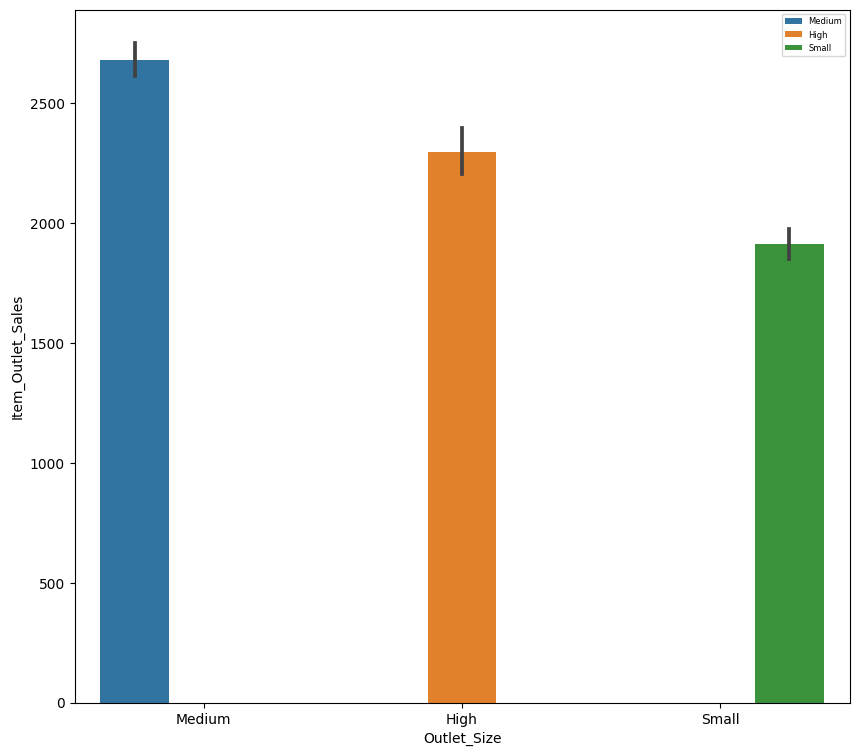

In [55]:
fig = plt.figure(figsize=(10,9))
j=sns.barplot(train['Outlet_Size'],train['Item_Outlet_Sales'],hue=train['Outlet_Size'])
ax1.title.set_text('item vs sales')
plt.legend(loc='upper right')
j.legend(fontsize=6)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


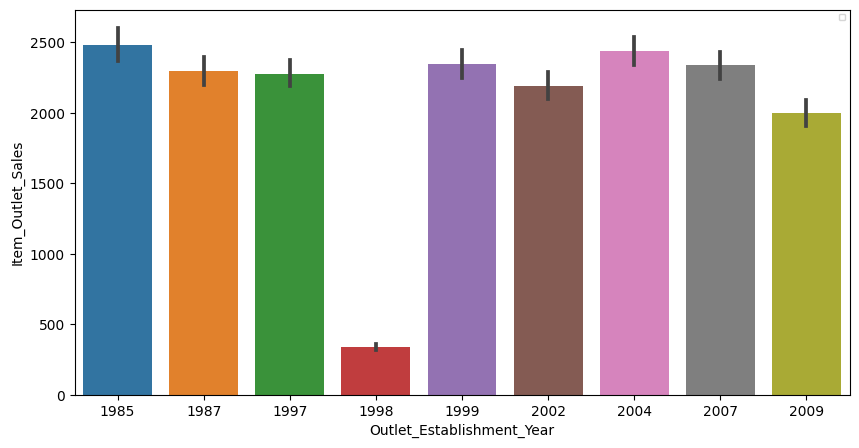

In [62]:

fig = plt.figure(figsize=(10,5))
k=sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
ax1.title.set_text(' outlate_size vs mrp')
plt.legend(loc='upper right')
k.legend(fontsize=6)

#Missing Value Treatments

In [69]:
df_missing_value=train.isnull().sum()
df_missing_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [70]:
median_weight=train['Item_Weight'].median()

In [71]:
print(train['Item_Weight'].var())

21.561688259836558


In [72]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
7931,FDO16,5.48,Low Fat,0.015170,Frozen Foods,82.2250,OUT018,2009,Medium,Tier 3,Supermarket Type2,2247.0750
7055,FDY27,6.38,Low Fat,0.031872,Dairy,179.5344,OUT013,1987,High,Tier 3,Supermarket Type1,4103.9912
6046,FDA44,19.70,Low Fat,0.053305,Fruits and Vegetables,58.1930,OUT049,1999,Medium,Tier 1,Supermarket Type1,848.8950
1733,FDJ27,17.70,Regular,0.122123,Meat,100.7674,OUT045,2002,NaN,Tier 2,Supermarket Type1,814.9392


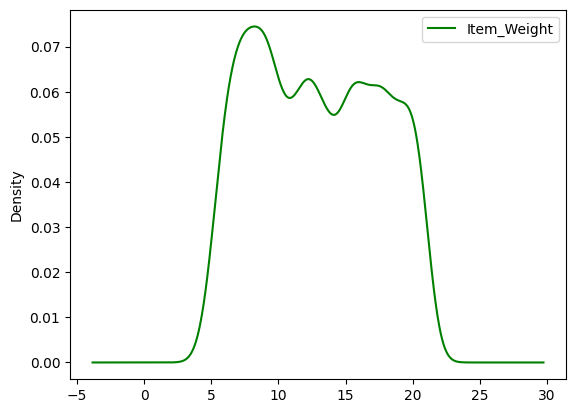

In [76]:
fig=plt.figure()
ax =fig.add_subplot(111)
train['Item_Weight'].plot(kind='kde',ax=ax,color='green')

plt.legend(loc='upper right')

<AxesSubplot:>

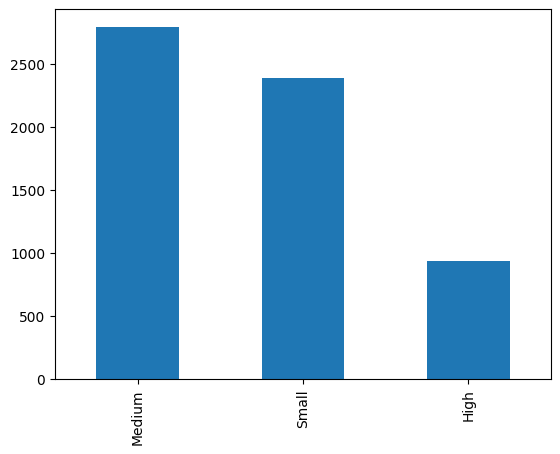

In [77]:
train['Outlet_Size'].value_counts().plot(kind='bar')

In [80]:
mod_size =train['Outlet_Size'].mode()
train['Item_Weight'].fillna(median_weight,inplace=True)
print(train['Item_Weight'].var())

17.869561454073647


In [81]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1284,FDT13,14.850,Low Fat,0.018568,Canned,188.2214,OUT035,2004,Small,Tier 2,Supermarket Type1,3014.7424
5756,DRN11,7.850,Low Fat,0.163311,Hard Drinks,143.5444,OUT045,2002,NaN,Tier 2,Supermarket Type1,3628.6100
2381,FDW34,9.600,Low Fat,0.000000,Snack Foods,244.8170,OUT035,2004,Small,Tier 2,Supermarket Type1,4374.3060
4021,FDX49,4.615,Regular,0.102038,Canned,231.9300,OUT045,2002,NaN,Tier 2,Supermarket Type1,2563.3300
3486,DRM47,9.300,Low Fat,0.043874,Hard Drinks,191.0846,OUT045,2002,NaN,Tier 2,Supermarket Type1,1337.5922


In [82]:
#Filling with mode val

train['Outlet_Size'].fillna('Medium',inplace =True)

In [83]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6798,FDF08,14.30,Regular,0.109144,Fruits and Vegetables,88.2856,OUT010,1998,Medium,Tier 3,Grocery Store,175.7712
1372,FDR55,12.15,reg,0.132831,Fruits and Vegetables,190.6872,OUT017,2007,Medium,Tier 2,Supermarket Type1,2269.0464
5135,FDK58,12.60,Regular,0.044765,Snack Foods,102.4016,OUT027,1985,Medium,Tier 3,Supermarket Type3,2428.8384
2405,NCN26,10.85,Low Fat,0.028680,Household,115.1808,OUT046,1997,Small,Tier 1,Supermarket Type1,2109.2544
7837,FDC16,12.60,Regular,0.020470,Dairy,88.2540,OUT027,1985,Medium,Tier 3,Supermarket Type3,2510.0660


#Feature Engineering

In [85]:
print(train['Item_Fat_Content'].unique())

print(train['Outlet_Size'].unique())

print(train['Outlet_Location_Type'].unique())

print(train['Outlet_Type'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [86]:
#outlet_identifier, item_identifier are not much related to sale so droping it.

train.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [87]:
print(train['Outlet_Size'].isnull().sum())

0


In [88]:

train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [89]:
train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [90]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


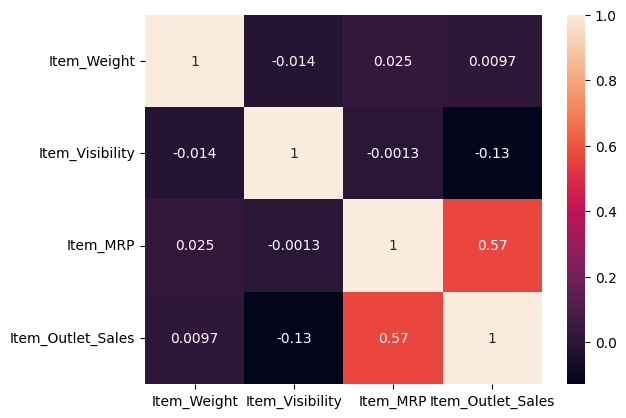

In [93]:
dataplot = sns.heatmap(train.corr(),annot=True)
plt.show()

In [94]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()    

In [95]:
train = train.apply(le.fit_transform)

In [96]:
train .sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2583,154,1,1673,13,3023,2,1,1,1315
3937,156,1,5452,5,3089,1,1,1,1122
6934,341,2,4303,1,5879,1,0,1,1952
4992,403,1,491,9,3133,1,2,2,1004
2157,320,1,2897,8,78,1,1,1,490


In [97]:
#Onehot Coding -Improvers Performance 
train= pd.get_dummies(train, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [98]:
train .sample(5)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
3519,157,1569,13,2019,1632,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
2732,336,2813,15,4226,2854,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
7274,203,0,5,2059,1326,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
7907,171,2090,5,5396,2666,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
264,262,4763,2,4023,1412,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [99]:
train.shape

(8523, 20)

In [100]:
target_col = "Item_Outlet_Sales"
X = train.loc[:, train.columns != target_col]
y = train.loc[:, target_col]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)

In [102]:
X_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
1921,190,7209,6,2317,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
655,398,494,9,1854,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
2229,322,3727,1,2740,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
2537,394,6512,13,5085,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
3528,384,5679,5,4324,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,286,7851,6,2840,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
5191,356,6493,5,1015,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
5390,376,856,8,5369,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
860,404,3739,13,2364,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [103]:
# Normalization
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [104]:
X_train_std= sc.fit_transform(X_train)

In [105]:
X_train_std= sc.fit_transform(X_train)
X_train_std

array([[-1.17065076,  1.46785148, -0.30006356, ..., -1.37038486,
        -0.35298645, -0.35508494],
       [ 1.0536572 , -1.34460321,  0.41725147, ...,  0.72972202,
        -0.35298645, -0.35508494],
       [ 0.24092929,  0.00947959, -1.49558862, ..., -1.37038486,
        -0.35298645,  2.81622757],
       ...,
       [ 0.81839386, -1.19298614,  0.17814646, ...,  0.72972202,
        -0.35298645, -0.35508494],
       [ 1.11781993,  0.01450557,  1.37367152, ...,  0.72972202,
        -0.35298645, -0.35508494],
       [ 0.6900684 , -1.24450244,  0.41725147, ...,  0.72972202,
        -0.35298645, -0.35508494]])

In [106]:
x_test_std = sc.fit_transform(X_test)

In [107]:
x_test_std

array([[ 0.46398858, -0.91496495, -0.50573737, ...,  0.72000594,
        -0.34145847, -0.34145847],
       [-0.91190621,  0.40154161,  0.19643663, ...,  0.72000594,
        -0.34145847, -0.34145847],
       [ 0.4843722 , -0.37710872, -0.97385337, ...,  0.72000594,
        -0.34145847, -0.34145847],
       ...,
       [ 0.92262017,  1.44870631,  0.43049463, ..., -1.38887743,
        -0.34145847, -0.34145847],
       [-0.00483483, -0.47888767,  1.36672663, ...,  0.72000594,
        -0.34145847, -0.34145847],
       [ 1.12645644, -1.30842746, -0.27167937, ...,  0.72000594,
        -0.34145847, -0.34145847]])

In [108]:
X_test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
7503,339,1509,5,1114,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2957,204,4691,8,292,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
7031,341,2809,3,275,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1084,322,3098,14,3933,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
856,295,361,10,4747,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,320,7462,9,2447,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
777,30,2038,3,4323,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1119,384,7222,9,4560,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0
3209,293,2563,13,2724,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


#Modeling

In [109]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [111]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [112]:
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
7503,339,1509,5,1114,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2957,204,4691,8,292,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
7031,341,2809,3,275,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1084,322,3098,14,3933,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
856,295,361,10,4747,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0


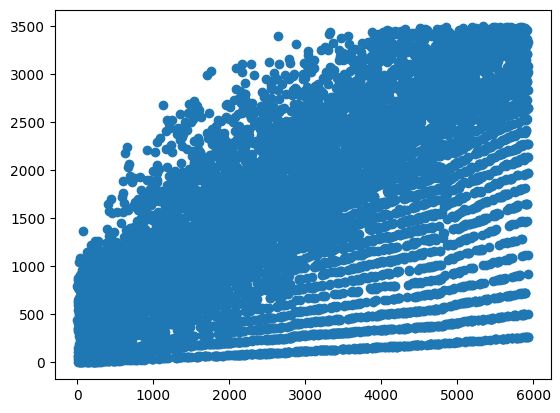

In [113]:
plt.scatter(train['Item_MRP'],train['Item_Outlet_Sales'])

In [114]:
lr.predict(x_test_std)

array([-6.96108716e+13,  4.19098610e+13,  3.79789539e+13, ...,
       -4.14663550e+14, -4.40119257e+13, -4.71031771e+13])

In [115]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
443     1663
777     2755
1119     698
3209     597
3742    1930
Name: Item_Outlet_Sales, Length: 2557, dtype: int64

In [132]:
y_pred_lr=lr.predict(x_test_std)

In [133]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [134]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

-4.336850667471873e+22
138305800860633.81
190450051674053.1


In [135]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [136]:
rf.fit(X_train_std,y_train)

RandomForestRegressor()

In [137]:
Y_pread_rf = rf.predict(x_test_std)

In [138]:
print(r2_score(y_test,Y_pread_rf))
print(mean_absolute_error(y_test,Y_pread_rf))
print(np.sqrt(mean_squared_error(y_test,Y_pread_rf)))

0.6346308259080721
416.08269065310907
552.7895347248976


In [139]:
# Regularized Linear Regression 
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.5)

In [144]:
reg.fit(X_train_std,y_train)

Ridge(alpha=0.5)

In [147]:
Y_pread_reg = reg.predict(x_test_std)

In [151]:
print(r2_score(y_test,Y_pread_reg))
print(mean_absolute_error(y_test,Y_pread_reg))
print(np.sqrt(mean_squared_error(y_test,Y_pread_reg)))

0.638134671832157
437.02509852899544
550.132557167111


#xgboost

In [156]:
from xgboost import XGBRegressor

In [157]:
regresor = XGBRegressor()

In [162]:
regresor.fit(X_train_std,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [163]:
Y_pread_xg = regresor.predict(x_test_std)

In [169]:
print(r2_score(y_test,Y_pread_xg))
print(mean_absolute_error(y_test,Y_pread_xg))
print(np.sqrt(mean_squared_error(y_test,Y_pread_xg)))

0.6142464018522886
430.5006214924445
568.0006773090046


In [170]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [172]:
miss_percent1 = [var for var in test.columns if test[var].isnull().mean()<0.5 and test[var].isnull().mean()>0]
miss_percent1

['Item_Weight', 'Outlet_Size']

In [173]:
median_weight1 =test['Item_Weight'].median()

In [174]:
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1521,DRM49,6.11,Regular,0.152573,Soft Drinks,45.1086,OUT018,2009,Medium,Tier 3,Supermarket Type2
2031,FDU26,16.70,Regular,0.042619,Dairy,117.3782,OUT046,1997,Small,Tier 1,Supermarket Type1
2714,NCN41,NaN,Low Fat,0.051956,Health and Hygiene,122.7730,OUT027,1985,Medium,Tier 3,Supermarket Type3
3825,NCD55,14.00,Low Fat,0.024311,Household,39.9454,OUT013,1987,High,Tier 3,Supermarket Type1
1103,FDF38,11.80,Regular,0.026411,Canned,40.1138,OUT045,2002,NaN,Tier 2,Supermarket Type1


<AxesSubplot:>

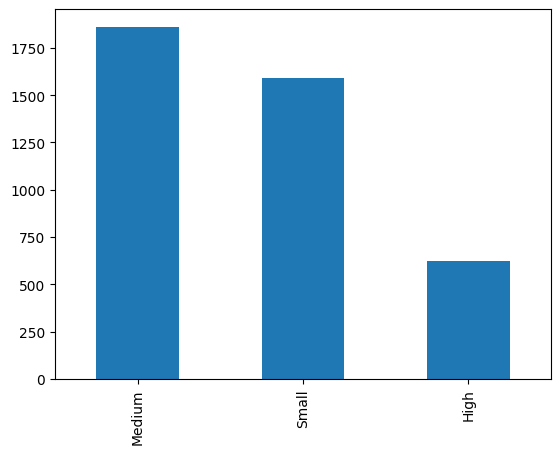

In [178]:
test['Outlet_Size'].value_counts().plot(kind='bar')

In [179]:
test['Item_Weight'].fillna(median_weight,inplace=True)

In [180]:
test['Outlet_Size'].fillna('Medium',inplace =True)

In [181]:
test.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [182]:
test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [183]:
test = test.apply(le.fit_transform)

In [184]:
test.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
1796,304,2,802,4,3212,1,2,2
3276,25,1,2235,8,2771,2,1,1
4193,357,0,2857,3,1246,1,1,1
1240,317,2,3523,6,1039,1,2,3
3704,355,0,4048,9,3687,1,1,1


In [185]:
test= pd.get_dummies(test, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [186]:
 X_test_1= sc.fit_transform(test)

In [187]:
y_pred_test_lr  =lr.predict(X_test_1)

In [188]:
#linear regression model test output 
y_pred_test_lr 

array([ 1.32077579e+13, -4.38069129e+13, -1.29000140e+14, ...,
       -1.26812204e+13, -1.69050801e+13, -1.69050801e+13])

In [189]:
Y_pread_test_rf = rf.predict(X_test_1)

In [190]:
#random forest  model test output 
Y_pread_test_rf

array([1268.83, 1094.74,  533.13, ..., 1510.09, 2569.75, 1108.65])

In [191]:
Y_pread_test_xg = regresor.predict(X_test_1)

In [192]:
 #xgboost  model test output

In [193]:
Y_pread_test_xg 

array([1168.6738, 1441.3713,  609.6174, ..., 1641.9307, 2788.298 ,
       1199.4434], dtype=float32)

#Summary

Data has 8523 rows. Aim is to build predictive model and findout sales of each product at a particular store. It is regression problem so analyze and predict the sale of bigmart data set. 